In [1]:
# 라이브러리 
# python 기본 라이브러리
import os 
import warnings

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 600)
pd.set_option("precision", 2)

In [4]:
plt.style.use("seaborn")
sns.set(font_scale=1.5)
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [5]:
# 데이터 경로
weather_data_path = os.path.join("data","기상데이터.csv")
gs_data_path = os.path.join("data", "GS25.csv")

In [7]:
weather = pd.read_csv(weather_data_path, encoding="cp949")
gs = pd.read_csv(gs_data_path, encoding="cp949")

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59113 entries, 0 to 59112
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bigcon_weather.tm       59113 non-null  int64  
 1   bigcon_weather.stn_id   59113 non-null  int64  
 2   bigcon_weather.pvn_nm   59113 non-null  object 
 3   bigcon_weather.bor_nm   59113 non-null  object 
 4   bigcon_weather.max_ta   58826 non-null  float64
 5   bigcon_weather.max_ws   58778 non-null  float64
 6   bigcon_weather.min_ta   58826 non-null  float64
 7   bigcon_weather.avg_ta   58814 non-null  float64
 8   bigcon_weather.avg_rhm  43913 non-null  float64
 9   bigcon_weather.avg_ws   58828 non-null  float64
 10  bigcon_weather.sum_rn   59059 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 5.0+ MB


In [10]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707786 entries, 0 to 2707785
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   korea_cvs.pvn_nm    object
 1   korea_cvs.sale_dt   int64 
 2   korea_cvs.gen_cd    object
 3   korea_cvs.age_cd    object
 4   korea_cvs.category  object
 5   korea_cvs.adj_qty   int64 
 6   korea_cvs.bor_nm    object
dtypes: int64(2), object(5)
memory usage: 144.6+ MB


In [72]:
pd.options.display.max_rows = 100

In [11]:
weather.head()

,bigcon_weather.tm,bigcon_weather.stn_id,bigcon_weather.pvn_nm,bigcon_weather.bor_nm,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
0,20160101,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
1,20160102,98,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2,20160103,98,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
3,20160104,98,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
4,20160105,98,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


In [14]:
gs.tail()

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
2707781,경기도,20181230,M,40~59,과자,7,여주시이천시
2707782,경기도,20181231,F,00~19,맥주,7,여주시이천시
2707783,경기도,20181231,F,20~39,생리대,7,여주시이천시
2707784,경기도,20181231,F,60~99,생리대,7,여주시이천시
2707785,경기도,20181231,M,20~39,아이스크림,7,여주시이천시


In [15]:
# shape
print(weather.shape)
print(gs.shape)

(59113, 11)
(2707786, 7)


In [16]:
# NA, null값이 있는지 확인
import missingno

<AxesSubplot:>

<Figure size 288x288 with 0 Axes>

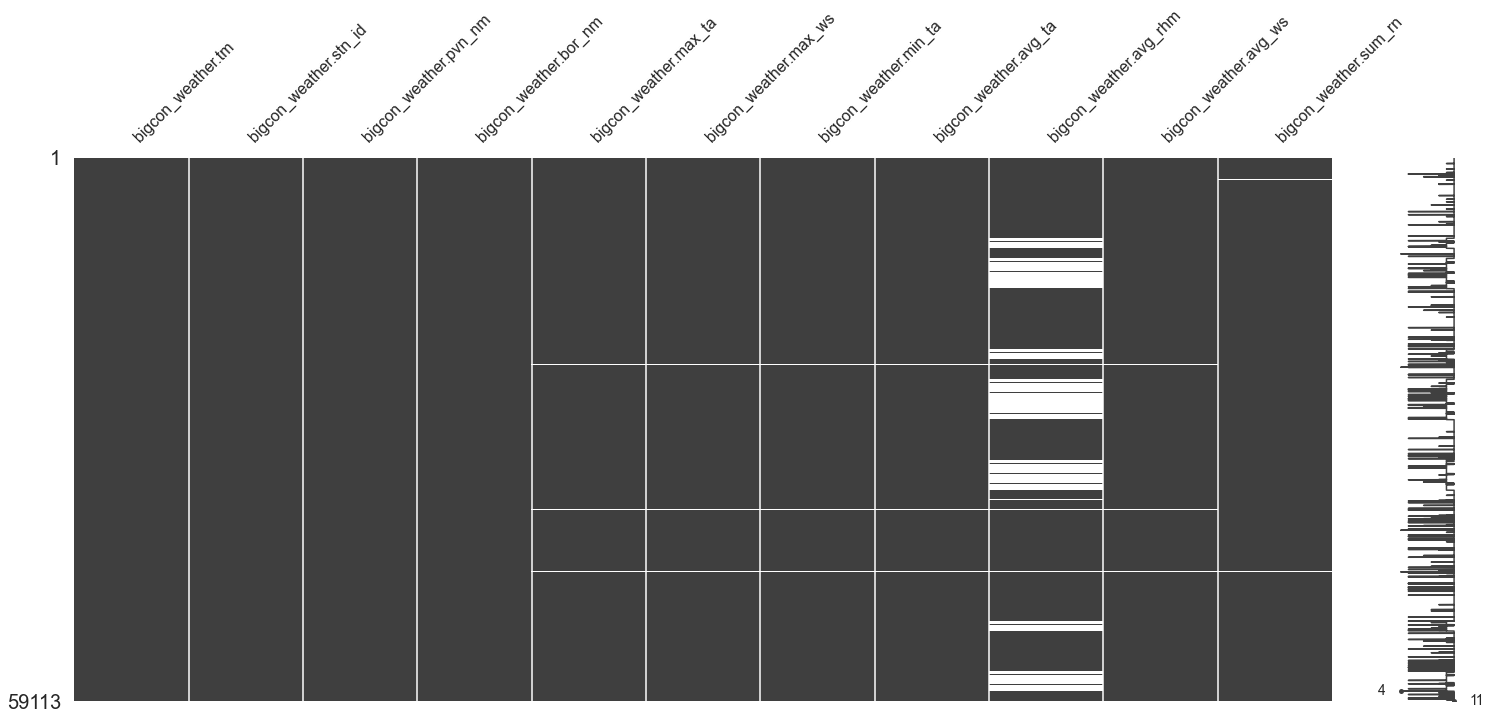

In [19]:
missingno.matrix(weather)

<AxesSubplot:>

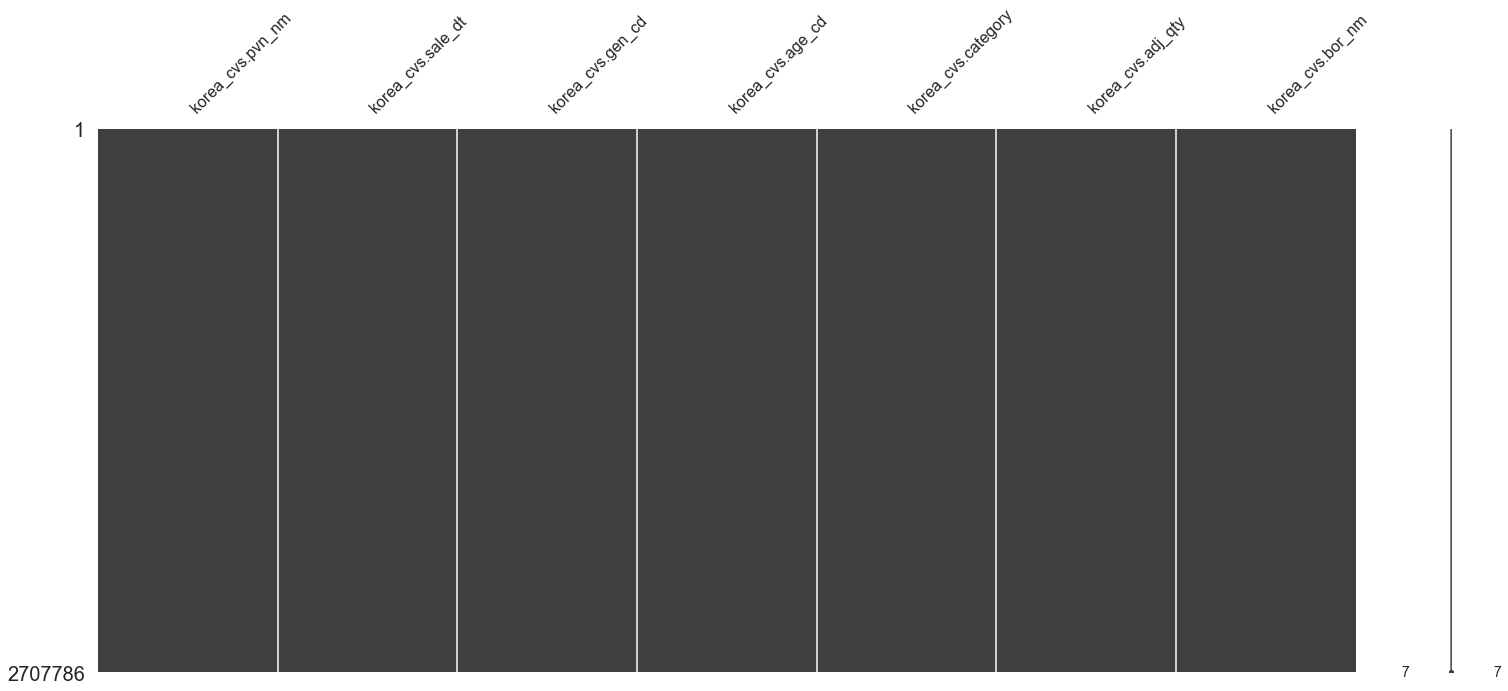

In [20]:
missingno.matrix(gs)

In [21]:
weather.isna().sum()

bigcon_weather.tm             0
bigcon_weather.stn_id         0
bigcon_weather.pvn_nm         0
bigcon_weather.bor_nm         0
bigcon_weather.max_ta       287
bigcon_weather.max_ws       335
bigcon_weather.min_ta       287
bigcon_weather.avg_ta       299
bigcon_weather.avg_rhm    15200
bigcon_weather.avg_ws       285
bigcon_weather.sum_rn        54
dtype: int64

In [22]:
# data -> dataframe
def na_value_check(data):
    na_value = data.isna().sum()
    na_ratio = round((na_value / len(data)) * 100, 2)
    return na_value, na_ratio

In [23]:
na_value, na_ratio = na_value_check(weather)

In [25]:
na_ratio

bigcon_weather.tm          0.00
bigcon_weather.stn_id      0.00
bigcon_weather.pvn_nm      0.00
bigcon_weather.bor_nm      0.00
bigcon_weather.max_ta      0.49
bigcon_weather.max_ws      0.57
bigcon_weather.min_ta      0.49
bigcon_weather.avg_ta      0.51
bigcon_weather.avg_rhm    25.71
bigcon_weather.avg_ws      0.48
bigcon_weather.sum_rn      0.09
dtype: float64

In [ ]:
# 관측일,관측번호,법정동코드.최고기온,최대풍속,최소기온,평균기온,평균 상대습도,평균 풍속, 합계 강수량

In [28]:
weather.head(1)

,bigcon_weather.tm,bigcon_weather.stn_id,bigcon_weather.pvn_nm,bigcon_weather.bor_nm,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
0,20160101,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0


In [35]:
# bigcon_weather.tm = 관측일
# bigcon_weather.stn_id = 관측번호
# bigcon_weather.pvn_nm = 법정동코드
# bigcon_weather.bor_nm = 법정동코드
# bigcon_weather.max_ta = 최고기온
# bigcon_weather.max_ws = 최대풍속
# bigcon_weather.min_ta = 최소기온
# bigcon_weather.avg_ta = 평균기온
# bigcon_weather.avg_rhm = 평균 상대습도
# bigcon_weather.avg_ws = 평균 풍속
# bigcon_weather.sum_rn = 합계 강수량

In [38]:
weather["bigcon_weather.bor_nm"].unique()

array(['동두천시', '파주시', '종로구', '수원시', '강화군', '양평군', '이천시', '강남구', '서초구',
       '강동구', '송파구', '강서구', '양천구', '도봉구', '노원구', '동대문구', '중랑구', '동작구',
       '마포구', '서대문구', '광진구', '성북구', '용산구', '은평구', '금천구', '중구', '성동구',
       '구로구', '강북구', '포천시', '관악구', '영등포구', '옹진군', '안성시', '가평군', '의정부시',
       '고양시', '남양주시', '안산시', '광주시', '여주시', '용인시', '오산시', '평택시', '시흥시',
       '구리시', '서구', '화성시', '성남시', '과천시', '양주시', '연수구', '부평구', '연천군'],
      dtype=object)

In [41]:
a = weather.loc[weather["bigcon_weather.bor_nm"] == "동두천시" , "bigcon_weather.avg_rhm"].mean()
b= weather.loc[weather['bigcon_weather.bor_nm'] == "동두천시", "bigcon_weather.avg_rhm"].fillna(a)

In [39]:
weather.loc[weather["bigcon_weather.bor_nm"] == "동두천시", "bigcon_weather.avg_rhm"] = b

0       74.0
1       70.0
2       82.0
3       55.0
4       36.0
        ... 
1091    25.0
1092    34.0
1093    33.0
1094    41.0
1095    42.0
Name: bigcon_weather.avg_rhm, Length: 1096, dtype: float64

In [26]:
for i in weather["bigcon_weather.bor_nm"].unique():
    a = weather.loc[weather["bigcon_weather.bor_nm"] == i , "bigcon_weather.avg_rhm"].mean()
    b = weather.loc[weather['bigcon_weather.bor_nm'] == i, "bigcon_weather.avg_rhm"].fillna(a)
    weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_rhm"] = b

In [29]:
for i in weather['bigcon_weather.bor_nm'].unique():
    a = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.max_ta'].mean()
    b = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.max_ta'].fillna(a)
    weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.max_ta'] = b

In [30]:
for i in weather['bigcon_weather.bor_nm'].unique():
    a = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.max_ws'].mean()
    b = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.max_ws'].fillna(a)
    weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.max_ws'] = b

In [31]:
for i in weather['bigcon_weather.bor_nm'].unique():
    a = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.min_ta'].mean()
    b = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.min_ta'].fillna(a)
    weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.min_ta'] = b

In [32]:
for i in weather['bigcon_weather.bor_nm'].unique():
    a = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.avg_ta'].mean()
    b = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.avg_ta'].fillna(a)
    weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.avg_ta'] = b

In [33]:
for i in weather['bigcon_weather.bor_nm'].unique():
    a = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.avg_ws'].mean()
    b = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.avg_ws'].fillna(a)
    weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.avg_ws'] = b

In [34]:
for i in weather['bigcon_weather.bor_nm'].unique():
    a = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.sum_rn'].mean()
    b = weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.sum_rn'].fillna(a)
    weather.loc[weather['bigcon_weather.bor_nm']==i, 'bigcon_weather.sum_rn'] = b

In [42]:
weather.describe()

,bigcon_weather.tm,bigcon_weather.stn_id,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
count,5.91e+04,59113.00,59113.00,59113.00,59113.00,59113.00,59113.00,59113.00,59113.00
mean,2.02e+07,444.70,18.11,3.90,7.96,12.68,46.61,1.56,3.04
std,8.17e+03,137.66,11.08,1.41,11.18,10.86,31.57,0.77,12.29
min,2.02e+07,98.00,-12.60,0.00,-24.40,-18.10,0.00,0.00,0.00
25%,2.02e+07,406.00,8.50,2.90,-1.40,3.30,0.00,1.00,0.00
50%,2.02e+07,421.00,20.00,3.70,8.70,13.90,57.00,1.40,0.00
75%,2.02e+07,548.00,27.50,4.70,17.60,21.90,71.00,1.90,0.00
max,2.02e+07,652.00,41.80,15.70,31.80,34.40,100.00,9.50,327.50


# 시각화

In [43]:
weather.columns

Index(['bigcon_weather.tm', 'bigcon_weather.stn_id', 'bigcon_weather.pvn_nm', 'bigcon_weather.bor_nm', 'bigcon_weather.max_ta', 'bigcon_weather.max_ws', 'bigcon_weather.min_ta', 'bigcon_weather.avg_ta', 'bigcon_weather.avg_rhm', 'bigcon_weather.avg_ws', 'bigcon_weather.sum_rn'], dtype='object')

**************************************************
--bigcon_weather.max_ta--


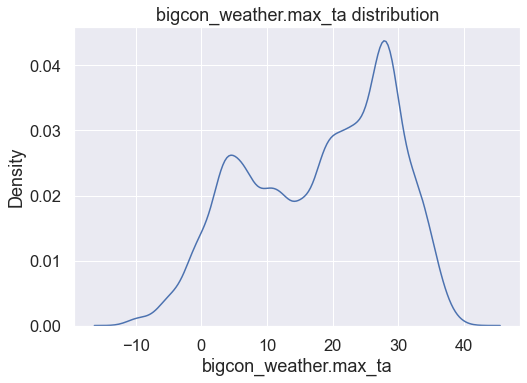

**************************************************
--bigcon_weather.max_ws--


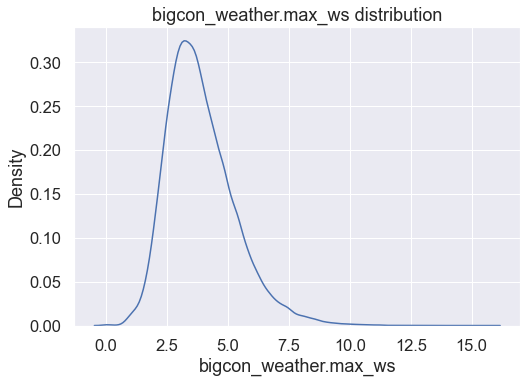

**************************************************
--bigcon_weather.min_ta--


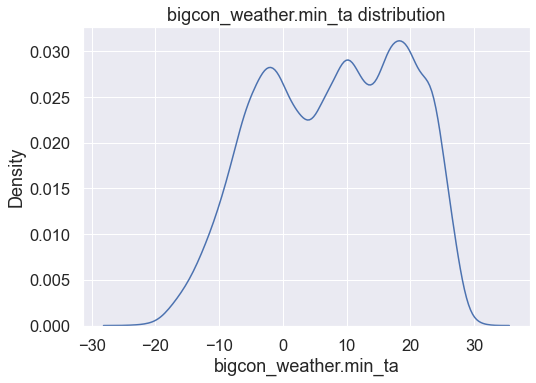

**************************************************
--bigcon_weather.avg_ta--


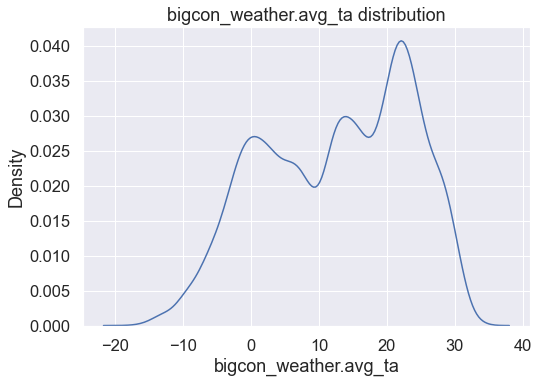

**************************************************
--bigcon_weather.avg_rhm--


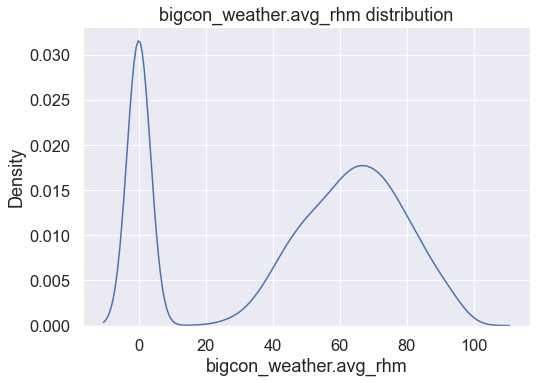

**************************************************
--bigcon_weather.avg_ws--


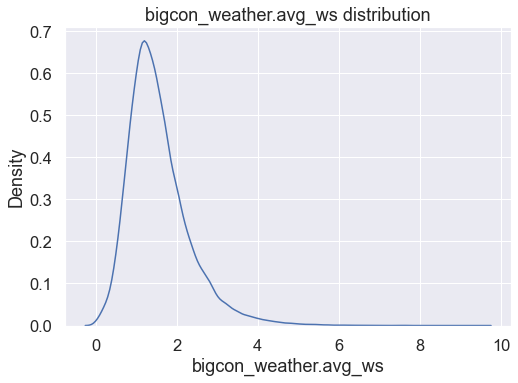

In [49]:
for col in weather.columns:
    # 날짜, id column은 스킵할게요
    if col in ['bigcon_weather.tm', "bigcon_weather.stn_id", "bigcon_weather.pvn_nm", "bigcon_weather.bor_nm", "bigcon_weather.sum_rn"]:
        continue
    print("*" * 50)
    print(f"--{col}--")
#     sns.distplot(weather[col], kde=False)
    plt.title(f"{col} distribution")
    sns.kdeplot(weather[col])
    plt.show()

**************************************************
--bigcon_weather.max_ta--


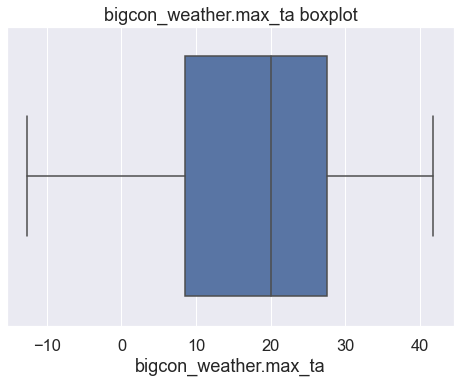

**************************************************
--bigcon_weather.max_ws--


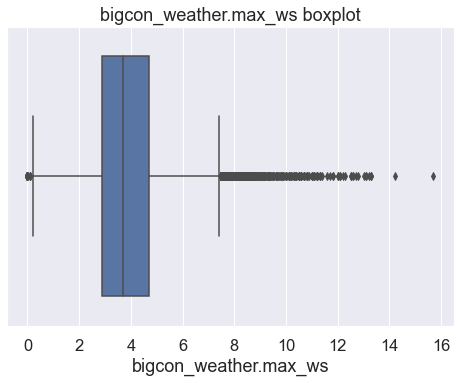

**************************************************
--bigcon_weather.min_ta--


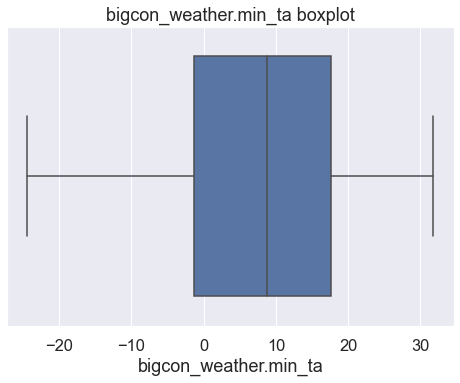

**************************************************
--bigcon_weather.avg_ta--


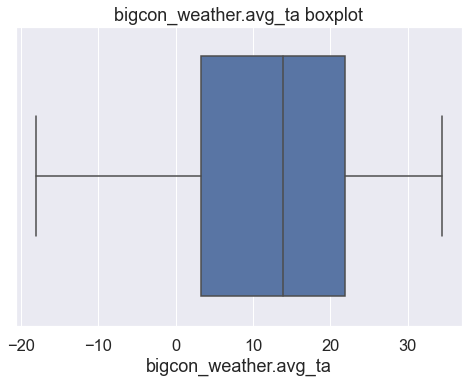

**************************************************
--bigcon_weather.avg_rhm--


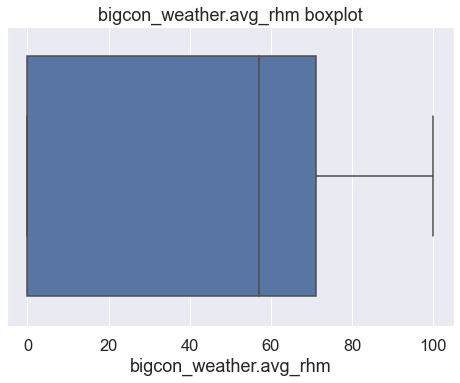

**************************************************
--bigcon_weather.avg_ws--


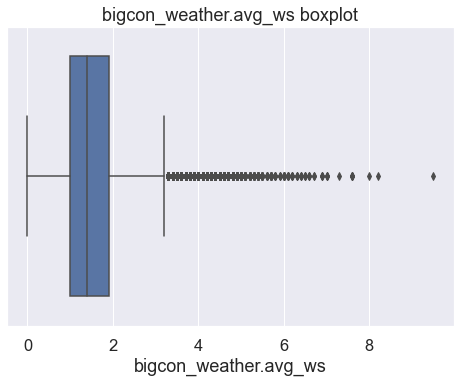

**************************************************
--bigcon_weather.sum_rn--


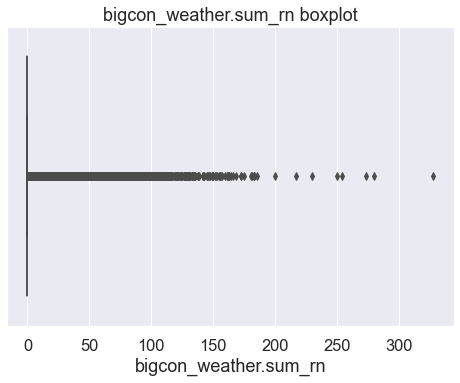

In [50]:
for col in weather.columns:
    # 날짜, id column은 스킵할게요
    if col in ['bigcon_weather.tm', "bigcon_weather.stn_id", "bigcon_weather.pvn_nm", "bigcon_weather.bor_nm"]:
        continue
    print("*" * 50)
    print(f"--{col}--")
#     sns.distplot(weather[col], kde=False)
    plt.title(f"{col} boxplot")
    sns.boxplot(weather[col], orient='v')
    plt.show()

In [55]:
type(weather["bigcon_weather.tm"][0])

str

In [ ]:
def temp(x):
    x = str(x)
    return x
== 

lambda x : str(x)

In [54]:
# index 를 datetime으로 바꿔야 함
weather["bigcon_weather.tm"] = weather["bigcon_weather.tm"].map(lambda x : str(x))

In [56]:
weather.set_index( pd.to_datetime(weather["bigcon_weather.tm"]) , inplace=True )        

In [58]:
weather_2 = weather.copy()

In [59]:
weather.drop("bigcon_weather.tm", axis=1, inplace=True)

In [60]:
weather.head()

,bigcon_weather.stn_id,bigcon_weather.pvn_nm,bigcon_weather.bor_nm,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
bigcon_weather.tm,,,,,,,,,,
2016-01-01,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
2016-01-02,98,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2016-01-03,98,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
2016-01-04,98,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
2016-01-05,98,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


<AxesSubplot:xlabel='bigcon_weather.tm'>

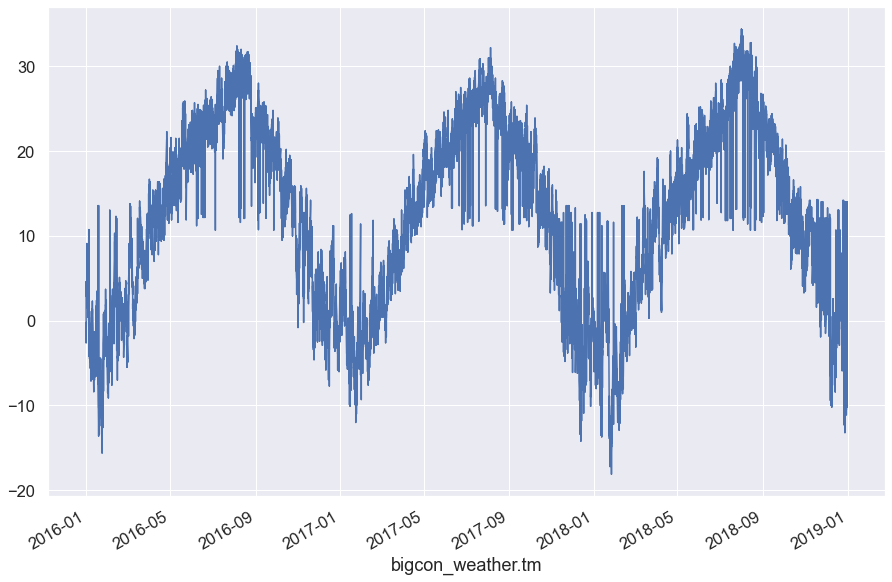

In [61]:
weather['bigcon_weather.avg_ta'].plot(figsize=(15,10))

<AxesSubplot:xlabel='bigcon_weather.tm'>

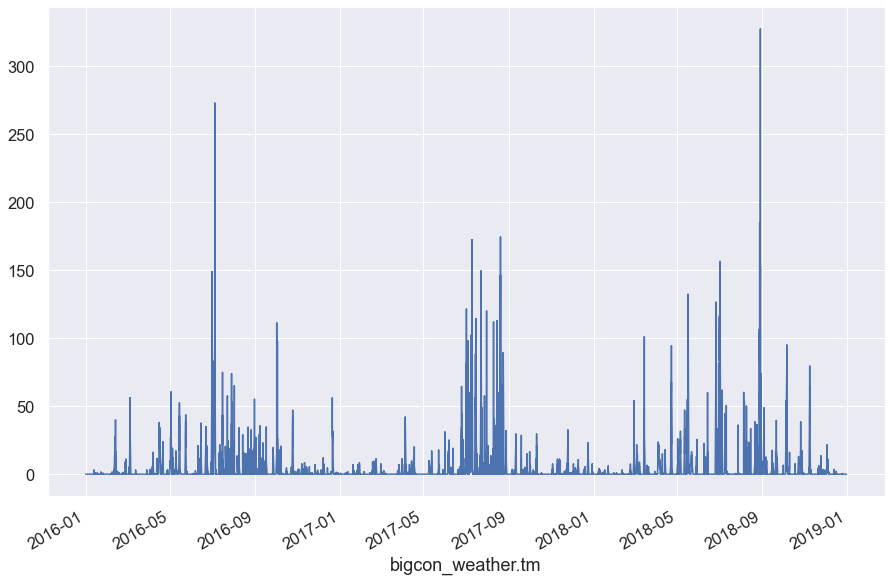

In [62]:
weather['bigcon_weather.sum_rn'].plot(figsize=(15,10))

<AxesSubplot:xlabel='bigcon_weather.tm'>

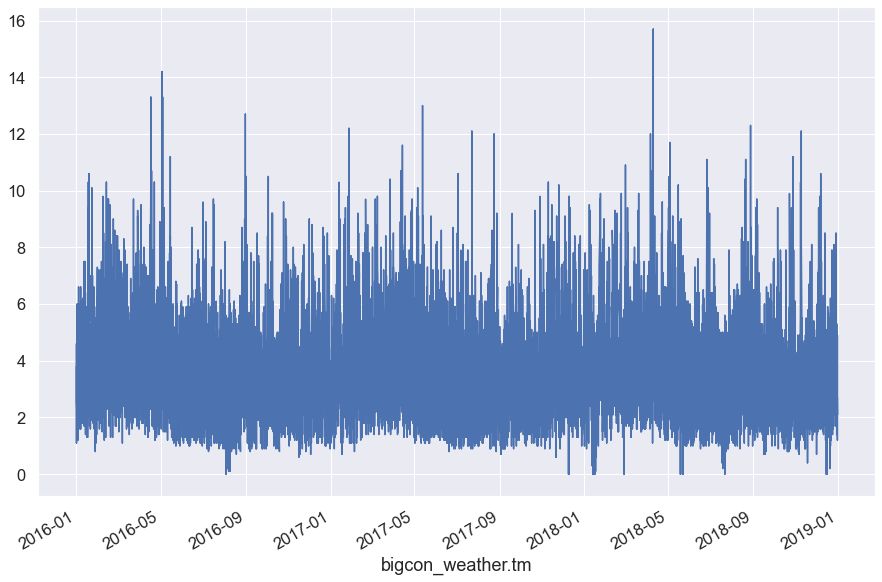

In [63]:
weather['bigcon_weather.max_ws'].plot(figsize=(15,10))

In [64]:
weather.columns

Index(['bigcon_weather.stn_id', 'bigcon_weather.pvn_nm', 'bigcon_weather.bor_nm', 'bigcon_weather.max_ta', 'bigcon_weather.max_ws', 'bigcon_weather.min_ta', 'bigcon_weather.avg_ta', 'bigcon_weather.avg_rhm', 'bigcon_weather.avg_ws', 'bigcon_weather.sum_rn'], dtype='object')

<AxesSubplot:xlabel='bigcon_weather.sum_rn', ylabel='bigcon_weather.max_ws'>

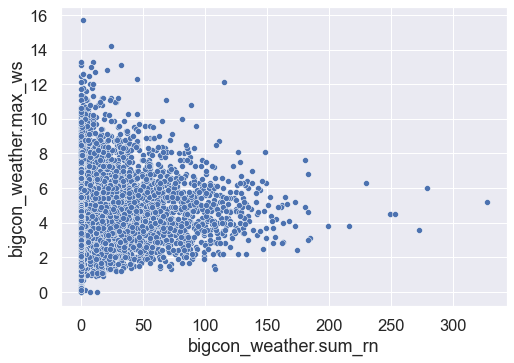

In [65]:
sns.scatterplot(x="bigcon_weather.sum_rn", y="bigcon_weather.max_ws", data=weather)

In [66]:
cor = weather.select_dtypes("float").corr()

<AxesSubplot:>

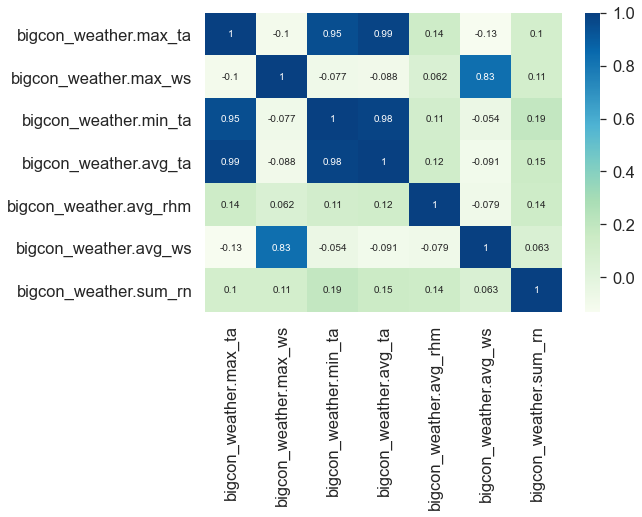

In [70]:
sns.heatmap(cor, cmap="GnBu", annot=True, annot_kws={"size" : 10})